<h1 align='center'>Data Exploratory Analysis For Credit Card Data</h1>

# Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Import the datasets

In [14]:
customer = pd.read_csv(r"C:\Users\mriga\Downloads\Customer Acqusition.csv")
spend = pd.read_csv(r"C:\Users\mriga\Downloads\spend.csv")

In [17]:
repay = pd.read_csv("Repayment.csv")

In [18]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [19]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [20]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


# Exploratory Data Analysis

In [21]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 8)
(1523, 5)
(1500, 5)


In [22]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [23]:
repay.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [24]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [25]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [26]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [27]:
repay.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [28]:
# dropping null values present in 'repay' data set
repay.dropna(inplace=True)

In [29]:
repay.isnull().sum()

SL No:        0.0
Customer      0.0
Month         0.0
Amount        0.0
Unnamed: 4    0.0
dtype: float64

# (1) In the above dataset,

## (a) In case age is less than 18, replace it with mean of age values.

In [30]:
mean_original = customer["Age"].mean()

In [31]:
print("The mean of Age column is",mean_original)

The mean of Age column is 46.49


In [32]:
#replacing age less than 18 with mean of age values
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [33]:
mean_new = customer["Age"].mean()

In [34]:
print("The new mean of Age column is",mean_new)

The new mean of Age column is 48.399399999999986


In [35]:
customer.loc[customer["Age"] < 18,"Age"]

Series([], Name: Age, dtype: float64)

In [36]:
print("All the customers who have age less than 18 have been replaced by mean of the age column.")

All the customers who have age less than 18 have been replaced by mean of the age column.


##  (b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [37]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [38]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [39]:
#merging customer and spend table on the basis of "Customer" column
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")

In [40]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [41]:
customer_spend.shape

(1500, 12)

In [42]:
#all the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [43]:
#if customer's spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [44]:
#there are no customers left whose spend amount is more than the limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


## (c)  Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [45]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [46]:
repay.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4


In [47]:
#merging customer and spend table on the basis of "Customer" column
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [48]:
customer_repay.head()

,SL No:,Month,Amount,Unnamed: 4,No,Customer,Age,City,Product,Limit,Company,Segment


In [49]:
#all the customers where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Month,Amount,Unnamed: 4,No,Customer,Age,City,Product,Limit,Company,Segment


In [50]:
#customers where repayment amount is more than the limit, replacing the repayment with the limit.
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [51]:
#there are no customers left where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Month,Amount,Unnamed: 4,No,Customer,Age,City,Product,Limit,Company,Segment


# (2) From the above dataset create the following summaries:

## (a) How many distinct customers exist?

In [52]:
distinct_customers = customer["Customer"].nunique()

In [53]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


## (b) How many distinct categories exist?

In [54]:
#customers from different segments
customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

C:\Users\mriga\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


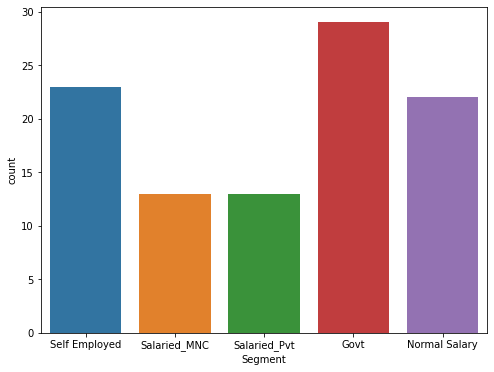

In [55]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

In [56]:
print("We can see from the countplot that number of distinct categories are", len(customer["Segment"].value_counts()))

We can see from the countplot that number of distinct categories are 5


## (c) What is the average monthly spend by customers?

In [57]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [58]:
#converting Month column of "spend" table to date time format
spend['Month'] = pd.to_datetime(spend['Month'])

In [59]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [60]:
#creating new columns which show "Month" and "Year"
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [61]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [62]:
#grouping the dataset based on 'Yearly' and 'monthly'
customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)

In [63]:
customer_spend_group

Sl No:     Amount
Yearly Monthly                     
2004   April      730.50  235272.04
       February   749.50  221215.27
       January    751.62  251712.07
       March      725.50  232146.12
       May        733.50  217539.24
       November   745.50  270486.40
       September  741.50  310923.38
2005   April      730.00  252181.33
       August     749.50  233734.63
       December   762.50  147503.06
       February   750.67  229802.28
       January    746.50  292741.37
       July       757.50  229116.66
       June       755.50  262688.11
       May        747.30  245696.52
       November   749.50  286143.32
       October    760.50  194568.64
       September  759.50  188666.20
2006   April      744.41  232468.97
       August     770.50  240699.72
       December   774.50  270470.98
       February   757.83  253858.26
       January    763.50  282058.01
       July       754.50  287505.10
       June       768.50  177252.39
       March      750.90  247166.08
       May        744.25  236162.74
       November   758.50  182841.29
       October    772.50  236136.34
       September  771.50  158520.09

##  (d) What is the average monthly repayment by customers?

In [64]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4


In [65]:
#coverting "Month" column to date time format
repay["Month"] = pd.to_datetime(repay["Month"])

In [66]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4


In [67]:
repay.dtypes

SL No:               float64
Customer              object
Month         datetime64[ns]
Amount               float64
Unnamed: 4           float64
dtype: object

In [68]:
#creating new columns which show "Month" and "Year"
repay['Monthly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Yearly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [69]:
#grouping the dataset based on 'Yearly' and 'monthly'
customer_repay_group= round(repay.groupby(['Yearly','Monthly']).mean(),2)

In [70]:
customer_repay_group

,,SL No:,Amount,Unnamed: 4
Yearly,Monthly,,,


## (e)  If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 

In [71]:
#merging all the three tables. Alreaady merged customer and spend table in 'customer_spend'. Using "customer_spend" and "repay"
#table to form the final "customer_spend_repay" table
customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")

In [72]:
customer_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Unnamed: 4,Monthly,Yearly


In [73]:
# renaming the columns for clearity
customer_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [74]:
customer_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Unnamed: 4,Monthly,Yearly


In [101]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount'and 'Repay_Amount'
interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()

C:\Users\mriga\AppData\Local\Temp\ipykernel_16988\2338189049.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()


In [102]:
interest_group

,,Spend_Amount,Repay_Amount
Yearly,Monthly,,


In [103]:
 # Monthly Profit = Monthly repayment – Monthly spend.
interest_group['Monthly Profit'] = interest_group['Repay_Amount'] - interest_group['Spend_Amount']

In [104]:
interest_group

,,Spend_Amount,Repay_Amount,Monthly Profit
Yearly,Monthly,,,


In [105]:
#interest earned is 2.9% of Monthly Profit
interest_group['Interest Earned'] = (2.9* interest_group['Monthly Profit'])/100

In [106]:
interest_group

,,Spend_Amount,Repay_Amount,Monthly Profit,Interest Earned
Yearly,Monthly,,,,


## (f) What are the top 5 product types?

In [107]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [108]:
#top 5 product types on which customer is spending
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

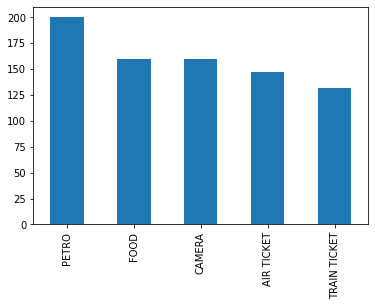

In [109]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

## (g)  Which city is having maximum spend?

In [110]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [111]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

In [112]:
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

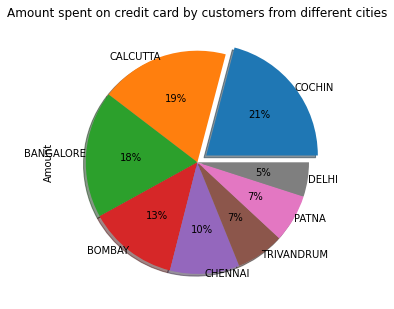

In [113]:
plt.figure(figsize=(5,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

In [114]:
print("From above pie chart we can see that Cochin is having maximum spend.")

From above pie chart we can see that Cochin is having maximum spend.


## (h) Which age group is spending more money?

In [115]:
#creating new column "Age Group" with 8 bins between 18 to 88 
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [116]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [117]:
#grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder
age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

In [118]:
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

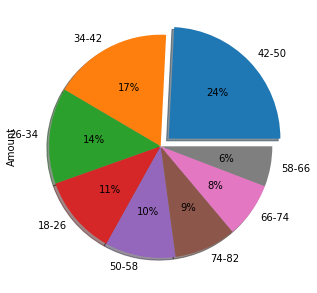

In [119]:
plt.figure(figsize=(5,10))
age_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

In [120]:
print("From the pie chart shown above we can say that age group 42 - 50 is spending more money")

From the pie chart shown above we can say that age group 42 - 50 is spending more money


## (i) Who are the top 10 customers in terms of repayment?

In [121]:
customer_repay.head()

,SL No:,Month,Amount,Unnamed: 4,No,Customer,Age,City,Product,Limit,Company,Segment


In [122]:
#grouping based on "Customer" column to find top 10 customers
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,


## (3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [123]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [124]:
#converting "Month" column to date time 
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

In [125]:
#creating new column "year" 
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [126]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004


In [127]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

In [128]:
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

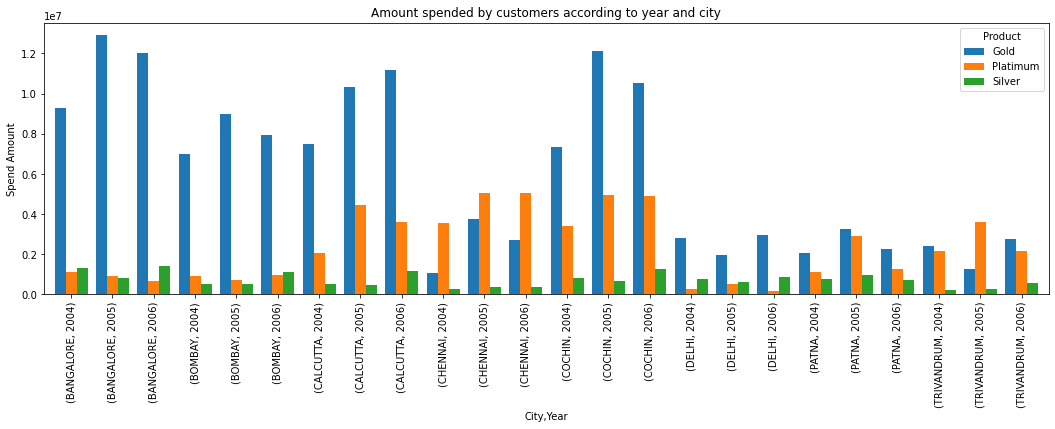

In [129]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

# (4) Create graphs for
 

## (a) Monthly comparison of total spends, city wise

In [130]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [131]:
#creating new column "Monthly" 
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [132]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [133]:
#grouping data based on "Monthly" and "City" columns
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [134]:
#creating pivot table based on "Monthly" and "City" columns
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

In [135]:
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


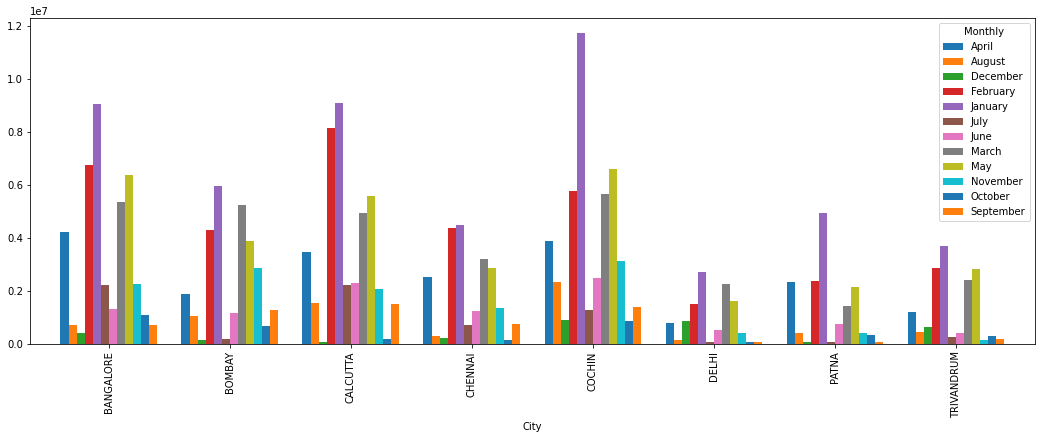

In [136]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

## (b) Comparison of yearly spend on air tickets

In [137]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [138]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [139]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]

In [140]:
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


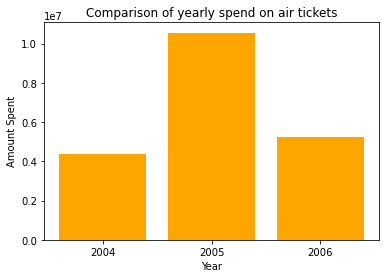

In [141]:
plt.bar(filtered["Year"],height=filtered["Amount"],color="orange")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()


## (c)  Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [142]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January


In [143]:
#creating pivot table based on "Monthly" and "Product" columns
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [144]:
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


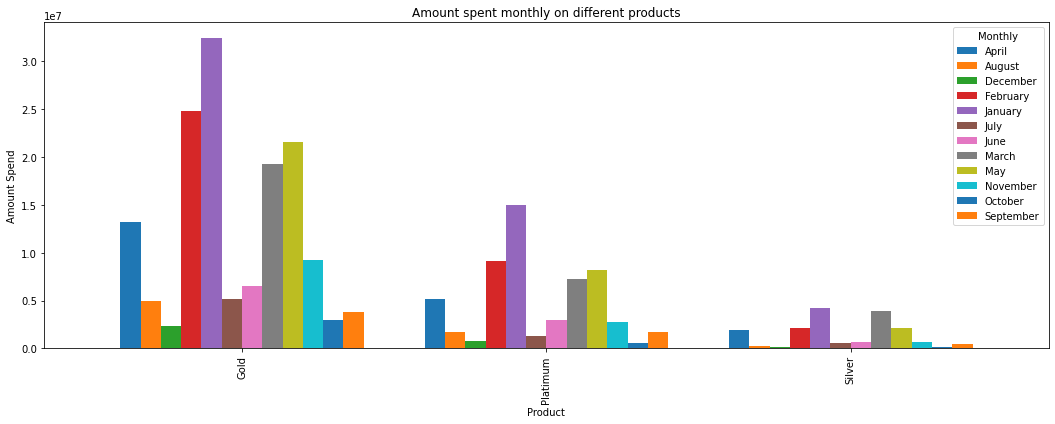

In [145]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

<b>We can see from the above graph that the sales are high for all the Products during the months:</b>
<ul>
    <li>January</li>
    <li>February</li>
    <li>March</li>
    <li>April</li>
    <li>May</li></ul>
<b> Out of these months,highest sales are in January </b> 

## (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [146]:
customer_repay.head(2)

,SL No:,Month,Amount,Unnamed: 4,No,Customer,Age,City,Product,Limit,Company,Segment


In [147]:
# converting 'Month' column to date time format
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

In [148]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [149]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [ ]:
summary_report('gold','monthly')